In [16]:
import numpy as np
import pandas as pd
from DataProcessing import Data

# 1. Get Data 

## 1.1. Get Data from folder

In [17]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [18]:
chosen_index = 'GOOGL'

In [19]:
d.preprocess(chosen_index)

Processing GOOGL.csv
Saved GOOGL data at data/processed/GOOGL.csv


In [20]:
df = d.get_data(chosen_index)

In [21]:
df.head

<bound method NDFrame.head of             Date       Close    Volume        RSI        MFI         EMA   
0     2019-04-01   59.949001  27706000  50.574879  42.786029   59.689202  \
1     2019-04-02   60.277000  18288000  52.087369  41.757490   59.767575   
2     2019-04-03   60.540501  22180000  55.936618  47.586047   59.870632   
3     2019-04-04   60.972500  21022000  59.088364  56.777268   60.017547   
4     2019-04-05   60.572498  20012000  56.871903  57.361764   60.091541   
...          ...         ...       ...        ...        ...         ...   
1240  2024-03-05  132.669998  40194800  27.724177  36.673777  138.831853   
1241  2024-03-06  131.399994  35318600  24.455353  31.088742  137.840939   
1242  2024-03-07  134.380005  37738200  35.160951  38.671604  137.379481   
1243  2024-03-08  135.410004  39343100  40.554529  45.948062  137.116884   
1244  2024-03-11  137.669998  32405500  43.991647  46.660682  137.190632   

             SO        MACD  Next Day Price  
0     48.69

In [22]:
df.columns

Index(['Date', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split

In [24]:
X = df[df.columns[1:8]].values
Y = df[df.columns[8]].values

## 2.1. Split data

### 2.1.2. Unchronologically

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37)

### 2.1.2. Chronologically

In [26]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Train model

In [27]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.955111173537948

## Plot Result

In [28]:
import matplotlib.pyplot as plt

In [29]:
Y_predict = model.predict(X_test)

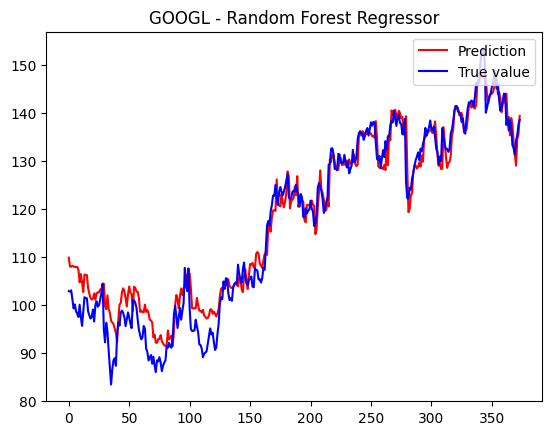

In [30]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Random Forest Regressor')
plt.show()